## Nick Jones DSC 478 Assignment 1

In [1]:
## load libraries
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bank_data = pd.read_csv(r"C:\Users\Owner\Documents\bank_data.csv")
bank_data = bank_data.drop('id', 1) # drop id
bank_data.head(n=5)

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [3]:
bank_data.shape  # 600 rows, 12 columns

(600, 11)


## 1. Explore the general characteristics of the data as a whole: examine the means, standard deviations, and other statistics associated with the numerical attributes; show the distributions of values associated with categorical attributes; etc.

In [4]:
bank_data.describe() # include="all"

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


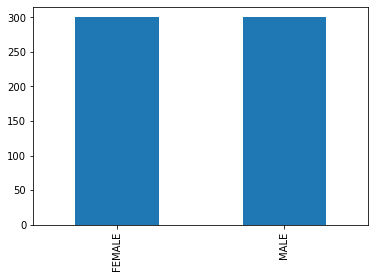

In [5]:
bank_cats = ['gender', 'region', 'married', 'car', 'savings_acct', 'current_acct', 'mortgage', 'pep']

bank_data['gender'].value_counts().plot(kind='bar')

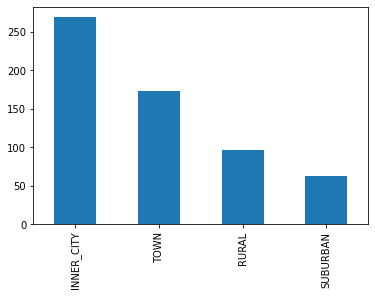

In [6]:
bank_data['region'].value_counts().plot(kind='bar')

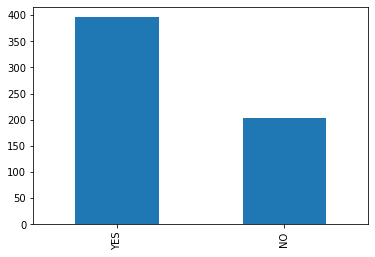

In [7]:
bank_data['married'].value_counts().plot(kind='bar')

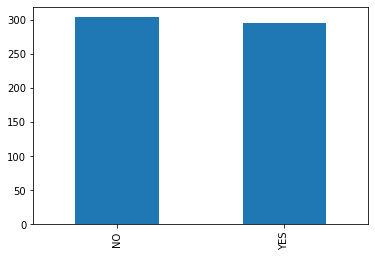

In [8]:
bank_data['car'].value_counts().plot(kind='bar')

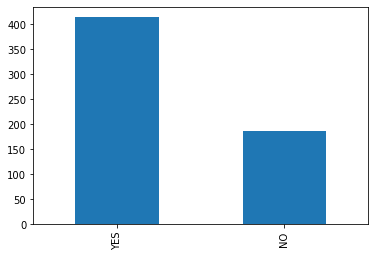

In [10]:
bank_data['savings_acct'].value_counts().plot(kind='bar')

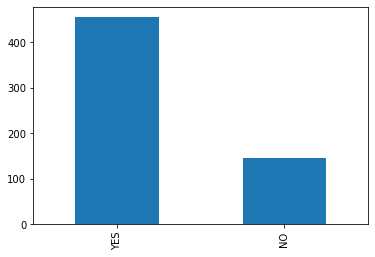

In [11]:
bank_data['current_acct'].value_counts().plot(kind='bar')

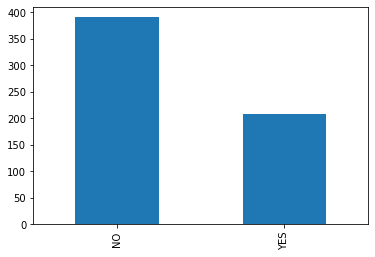

In [12]:
bank_data['mortgage'].value_counts().plot(kind='bar')

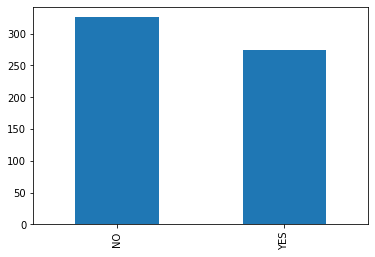

In [13]:
bank_data['pep'].value_counts().plot(kind='bar')

The bar plots above show the distribution of the categorical variables by there unique levels. Understanding the underlying distribution can help lead to selecting appropriate data pre-processing techniques.

## 2. Suppose that because of the bank is particularly interested in customers who buy the PEP (Personal Equity Plan) product. Compare and contrast the subsets of customers who buy and don't buy the PEP. Compute summaries (as in part 1) of the selected data with respect to all other attributes. Can you observe any significant differences between these segments of customers? Discuss your observations

In [38]:
# get a statistical summary by pep respones
bank_data.groupby('pep').describe(include='all')

age                                                              \
     count unique top freq      mean       std  min       25%      50%   
pep                                                                      
NO   326.0    NaN NaN  NaN  0.450983  0.288235  0.0  0.183673  0.44898   
YES  274.0    NaN NaN  NaN  0.553627  0.292408  0.0  0.326531  0.55102   

               ... mortgage                                              
          75%  ...   unique top freq mean  std  min  25%  50%  75%  max  
pep            ...                                                       
NO   0.673469  ...        2  NO  209  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
YES  0.816327  ...        2  NO  182  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[2 rows x 110 columns]

In [41]:
region_pep = pd.crosstab(bank_data["region"], bank_data["pep"])
married_pep = pd.crosstab(bank_data["married"], bank_data["pep"])
car_pep = pd.crosstab(bank_data["car"], bank_data["pep"])
savings_pep = pd.crosstab(bank_data["savings_acct"], bank_data["pep"])
current_pep = pd.crosstab(bank_data["current_acct"], bank_data["pep"])
mortgage_pep = pd.crosstab(bank_data["mortgage"], bank_data["pep"])


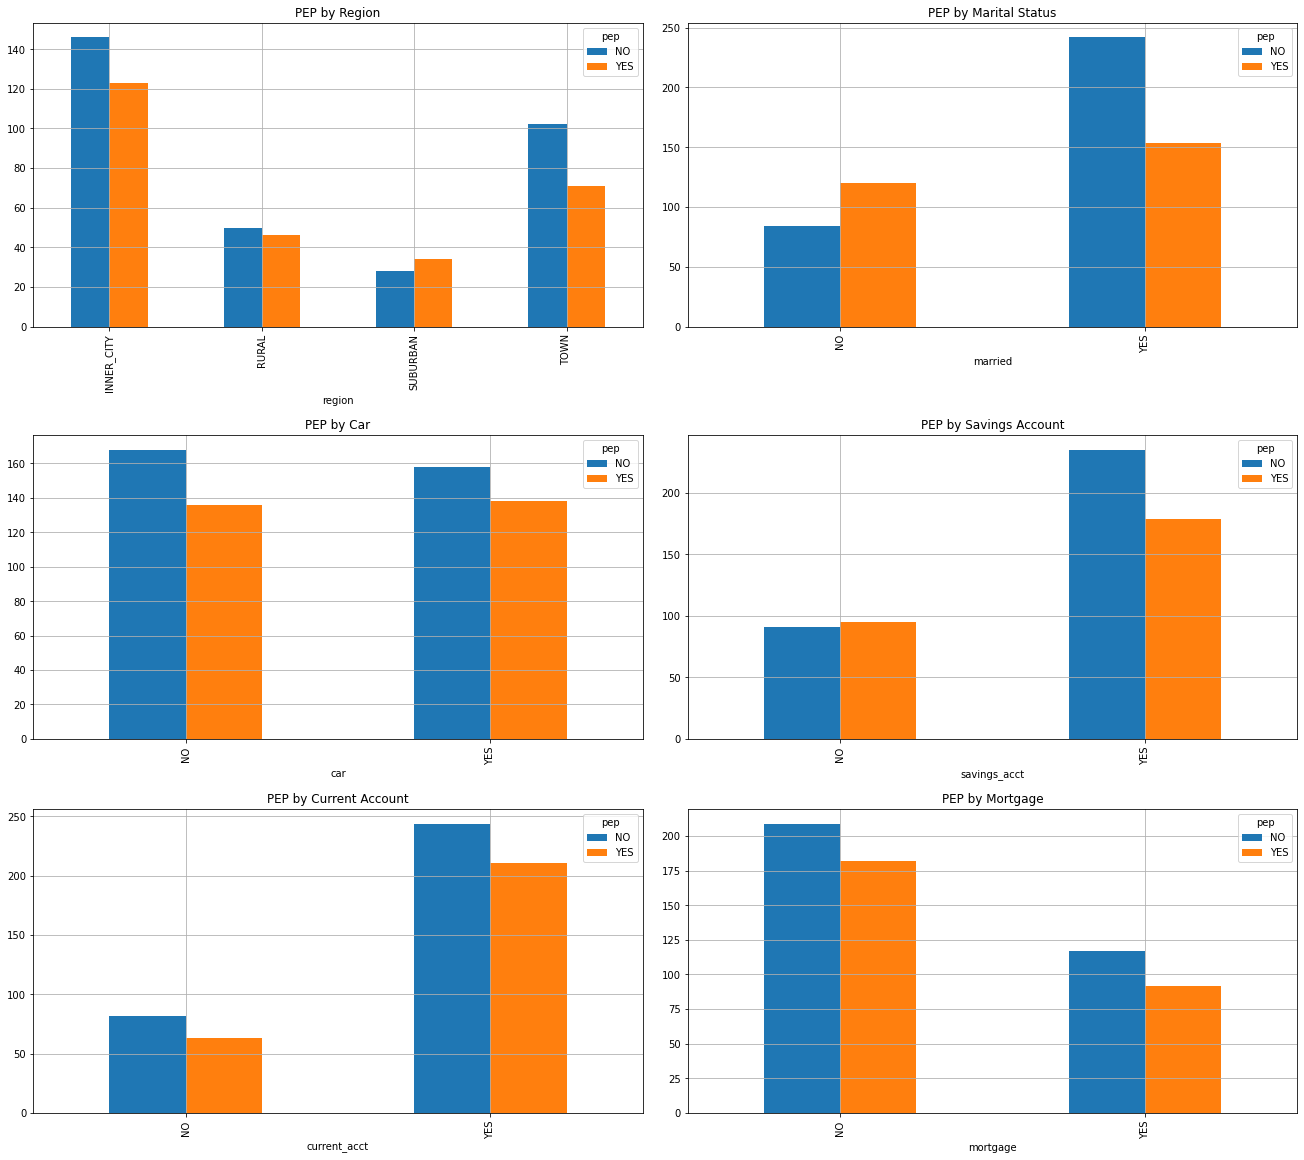

In [42]:
fig, ((ax1, ax2), (ax3, ax4),
      (ax5, ax6)) = plt.subplots(3, 2,figsize=(18,16),constrained_layout=True)

region_pep.plot(ax=ax1, kind='bar',grid=True,title="PEP by Region")
married_pep.plot(ax=ax2, kind='bar',grid=True,title="PEP by Marital Status")
car_pep.plot(ax=ax3, kind='bar',grid=True,title="PEP by Car")
savings_pep.plot(ax=ax4, kind='bar',grid=True,title="PEP by Savings Account")
current_pep.plot(ax=ax5, kind='bar',grid=True,title="PEP by Current Account")
mortgage_pep.plot(ax=ax6, kind='bar',grid=True,title="PEP by Mortgage")


Yes to pep has greater mean age (45) than no pep (40)
People with pep are more likely to be single
In the suburbs is the only place you are more likely to have pep plan than no pep plan

## 3. Use z-score normalization to standardize the values of the income attribute. [Do not change the original income attribute in the table.]

In [17]:
income_z = (bank_data["income"] - bank_data["income"].mean()) / bank_data["income"].std()
income_z.head(n=10)


0   -0.773523
1    0.198541
2   -0.848766
3   -0.554180
4    1.787071
5    0.802015
6   -1.445560
7   -0.199809
8   -0.172079
9   -0.256749
Name: income, dtype: float64

## 4. Discretize the age attribute into 3 categories (corresponding to "young", "mid-age", and "old"). [Do not change the original age attribute in the table.]

In [18]:
age_bins = pd.qcut(bank_data.age, [0, .33, .66, 1], labels=["young", "mid-age", "old"], retbins=True)
age_bins

(0      mid-age
 1      mid-age
 2          old
 3        young
 4          old
         ...   
 595        old
 596      young
 597      young
 598      young
 599    mid-age
 Name: age, Length: 600, dtype: category
 Categories (3, object): [young < mid-age < old],
 array([18., 35., 49., 67.]))

## 5. Use Min-Max Normalization to transform the values of all numeric attributes in the original table (income, age, children) onto the range 0.0-1.0.


In [22]:
# vectorized operations done on each of the numeric vectors
mins = bank_data[["age", "income", "children"]].min()
maxs = bank_data[["age", "income", "children"]].max()
print(mins)
print(maxs)

age           18.00
income      5014.21
children       0.00
dtype: float64
age            67.0
income      63130.1
children        3.0
dtype: float64


In [37]:
bank_data.income=(bank_data.income - min(bank_data.income))/(max(bank_data.income)-min(bank_data.income))
bank_data.age=(bank_data.age - min(bank_data.age))/(max(bank_data.age)-min(bank_data.age))
bank_data.children=(bank_data.children - min(bank_data.children))/(max(bank_data.children)-min(bank_data.children))
bank_data.head(10)


,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,0.612245,0.215634,0.333333,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,0.448980,0.431395,1.000000,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,0.673469,0.198933,0.000000,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,0.102041,0.264320,1.000000,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,0.795918,0.783987,0.000000,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
5,0.795918,0.565343,0.666667,FEMALE,TOWN,YES,NO,YES,YES,NO,YES
6,0.081633,0.066468,0.000000,MALE,RURAL,NO,NO,NO,YES,NO,YES
7,0.816327,0.342977,0.000000,MALE,TOWN,YES,YES,YES,YES,NO,NO
8,0.387755,0.349132,0.666667,FEMALE,SUBURBAN,YES,YES,NO,NO,NO,NO
9,0.734694,0.330338,0.666667,MALE,TOWN,YES,YES,YES,YES,NO,NO


## 6. Convert the table (after normalization in part 5) into the standard spreadsheet format. Note that this requires converting each categorical attribute into multiple binary ("dummy") attributes (one for each values of the categorical attribute) and assigning binary values corresponding to the presence or not presence of the attribute value in the original record). Then numeric attributes should remain unchanged. Save this new table into a file called bank_numeric.csv and submitit along with your assignment. [Hint: you might consider using the get_dummies for Pandas data frames.]

In [25]:
bank_numeric = pd.get_dummies(bank_data)
bank_numeric.head(n=5)

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
0,48,17546.0,1,1,0,1,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
1,40,30085.1,3,0,1,0,0,0,1,0,...,0,1,1,0,0,1,0,1,1,0
2,51,16575.4,0,1,0,1,0,0,0,0,...,0,1,0,1,0,1,1,0,1,0
3,23,20375.4,3,1,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,1,0
4,57,50576.3,0,1,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [27]:
# save csv file
bank_numeric.to_csv('bank_numeric.csv')

## 7. Using the standardized data set (of the previous part), perform basic correlation analysis among the attributes. Discuss your results by indicating any significant positive or negative correlations among pairs of attributes. You need to construct a complete Correlation Matrix. Be sure to first remove the Customer ID column before creating the correlation matrix. [Hint: you can do this by using the corr() function in Pandas or corrcoef function in NumPy]

In [28]:
bank_numeric.corr()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
age,1.000000,0.752726,0.023572,0.090081,-0.090081,-0.025171,0.018635,0.031345,-0.008510,-0.010394,...,-0.077733,0.077733,-0.184389,0.184389,0.035312,-0.035312,0.016154,-0.016154,-0.173825,0.173825
income,0.752726,1.000000,0.036761,0.023845,-0.023845,-0.047564,0.084776,0.029824,-0.036431,0.008386,...,-0.081556,0.081556,-0.266164,0.266164,-0.031616,0.031616,0.014662,-0.014662,-0.221991,0.221991
children,0.023572,0.036761,1.000000,0.014206,-0.014206,-0.051222,0.089902,-0.014122,-0.007033,0.048716,...,-0.036455,0.036455,-0.041536,0.041536,-0.006238,0.006238,0.074339,-0.074339,0.057663,-0.057663
gender_FEMALE,0.090081,0.023845,0.014206,1.000000,-1.000000,-0.023459,-0.009092,-0.010951,0.040472,0.021110,...,0.006667,-0.006667,0.007207,-0.007207,-0.019466,0.019466,0.066465,-0.066465,0.046843,-0.046843
gender_MALE,-0.090081,-0.023845,-0.014206,-1.000000,1.000000,0.023459,0.009092,0.010951,-0.040472,-0.021110,...,-0.006667,0.006667,-0.007207,0.007207,0.019466,-0.019466,-0.066465,0.066465,-0.046843,0.046843
region_INNER_CITY,-0.025171,-0.047564,-0.051222,-0.023459,0.023459,1.000000,-0.393444,-0.306032,-0.573814,-0.003254,...,0.018143,-0.018143,0.091373,-0.091373,-0.007894,0.007894,-0.002098,0.002098,-0.001054,0.001054
region_RURAL,0.018635,0.084776,0.089902,-0.009092,0.009092,-0.393444,1.000000,-0.148158,-0.277798,0.022649,...,-0.024006,0.024006,-0.036960,0.036960,0.008496,-0.008496,0.051908,-0.051908,-0.019714,0.019714
region_SUBURBAN,0.031345,0.029824,-0.014122,-0.010951,0.010951,-0.306032,-0.148158,1.000000,-0.216080,-0.012483,...,0.061184,-0.061184,-0.002605,0.002605,-0.038157,0.038157,-0.004635,0.004635,-0.062508,0.062508
region_TOWN,-0.008510,-0.036431,-0.007033,0.040472,-0.040472,-0.573814,-0.277798,-0.216080,1.000000,-0.006369,...,-0.041604,0.041604,-0.068654,0.068654,0.027431,-0.027431,-0.036591,0.036591,0.059115,-0.059115
married_NO,-0.010394,0.008386,0.048716,0.021110,-0.021110,-0.003254,0.022649,-0.012483,-0.006369,1.000000,...,-0.009571,0.009571,0.028604,-0.028604,-0.059996,0.059996,-0.021711,0.021711,-0.189578,0.189578


## 8. Using Matplotlib library and/or ploting capabilties of Pandas, create a scatter plot of the (non-normalized) Income attribute relative to Age. Be sure that your plot contains appropriate labels for the axes. Do these variables seem correlated?

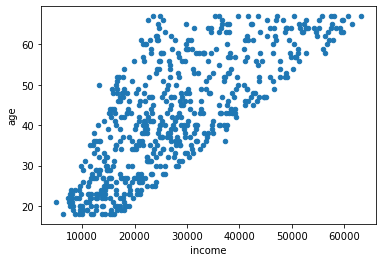

In [30]:
# read in the original file again to get the non-normalized data again
bank_data.plot(x="income", y="age", kind="scatter")

## 9. Create histograms for (non-normalized) Income (using 9 bins) and Age (using 15 bins).

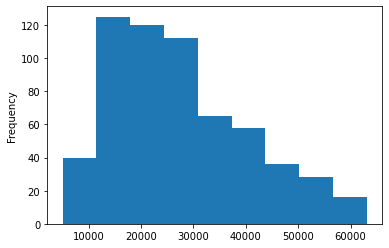

In [31]:
bank_data["income"].plot(kind="hist", bins=9)


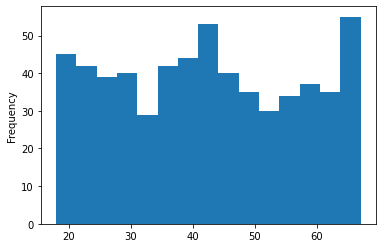

In [32]:
bank_data["age"].plot(kind="hist", bins=15)

## 10. Using a bargraph, plot the distribution of the values of the region attribute.

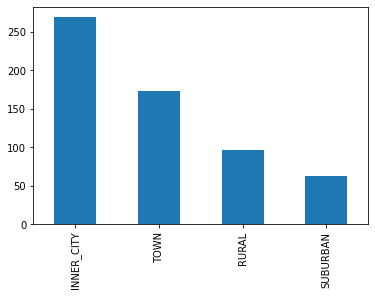

In [33]:
bank_data['region'].value_counts().plot(kind='bar')

## 11. Perform a cross-tabulation of the region attribute with the pep attribute. This requires the aggregation of the occurrences of each pep value (yes or no) separately for each value of the region attribute. Show the results as a 4 by 2 (region x pep) table with entries representing the counts. [Hint: you can either use Numpy or use aggregations fucntions in Pandas such as groupby() and cross-tab().] Then, either using Matplotlib directly or the plot() function in Pandas create a bar chart graph to visualize of the relationships between these sets of variables. [Hint: This example of creating simple bar charts using Matplotlib may be useful.]

In [34]:
pr = pd.crosstab(bank_data.region, bank_data.pep) # region as rows, pep as columns
print(pr)

pep          NO  YES
region              
INNER_CITY  146  123
RURAL        50   46
SUBURBAN     28   34
TOWN        102   71


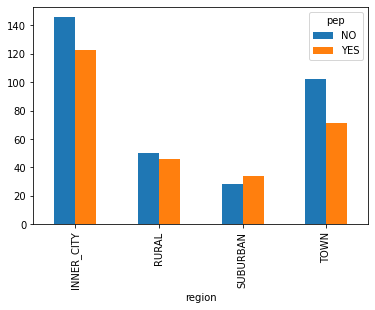

In [35]:
pr.plot(kind="bar")